# Titanic Data Analysis

### Author: Ram Parvesh

# Contents

### Overview

>1.Importing all the libraries necessary for this project
>
>2.Load Data from CSVs
>
>3.Fixing NaN data values
>>   a.Explanation: Why median is considered ro replace NaN values in column "Age"?
>
>4.Data Analysis
 >> a.Percentage Deaths and Survivors
 >
 >>  b.Female - Male -- Deaths and Survivors
 >
 >> c.Age of Passengers
 >
   >>d.Number of Passengers Traveling with their Sibling/Spouse
>
   >>e.Number of Passengers traveling with their Parents/Children
>
   >>f.Number of Passengers Traveling in Different Socio-Economic Classes
>
   >>g.Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors
>
   >>h.Box Plot of Survivors from Pclass 1, 2 nad 3
>
   >>i.Distribution of Survivors with respect to Embarkment
>
   >>j.Number of Passengers that Died and Survived with respect to the Fare
>
   >>k.Distribution of Deck (Cabin) and Survived
>
   >>l.Distribution of Names interms of Titles
>
>5.Prediction Algorithms
   >> a.Make data appropriate for Training and Testing and dropping some of the Data which is not Necessary
>
   >> b.Logistic Regression-Implementation and Results
>
   >> c. K-NN Classifier- Implementation and Results
>
   >> d.Gradient Boosting Classifier-Implementation and Results
>
   >> e. Random Forest Classification Algorithm- Implementation and Results
>
>6.Conclusion



# Overview

This study is an exercise to show how to use foundations of Data Science in order to import, study, visualize, and present the raw data in a method that is easy for any user to digest and understand.

This study uses passenger data from the ill-fated maiden voyage of the RMS Titanic (1912). The data (and explanation of the data) can be obtained from:[Kaggle](https://www.kaggle.com/c/titanic/data)

First, the raw comma separated values (.cvs) data will be loaded into a Python (NumPy) series.

Second, there will be some data exploration. This will be completed mostly by loading plots of different data slices in order to better understand the data with visualization. Visualizing the data makes generating a hypothesis easier.

Third, the data will be analyzed.

Lastly, a prediction model using two algorithms is used to predict how accurate the models work on the titanic dataset and a confusion matrix is plot to clearly see the obtained results. This model is created, where, if given some new data related to titanic (which is in the form of the data provided by kaggle), can predict if the person will/will not survive, with an accuracy of percentage of both the algorithms implemented.
Note:

This is a Jupyter iPython Notebook. It allows code to be written, code output to be displayed, and also markup. It allows the analysis to be conducted and displayed. Comments that are intended for a general audience are presented in markup 'plain' text below each code segment. Comments that have to do with how the code works are above the code with a leading hashtag(#). However, due to the heavy display of Python code; it is not suitable for all audiences. For example, if I were presenting my analysis to upper management, board of directors, a general audience, etc. I would not use this Notebook. I'd have much of the output in a PowerPoint type presentation. However, I would have the Jupyter Notebook available as a supplement, in case anyone wanted to see the code. Or, more importantly, the amount of work it took to create the pretty graphics.

The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Dictionary

- Variable Definition Key
- survival Survival 0 = No, 1 = Yes
- pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sex Sex
- Age Age in years
- sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic
- ticket Ticket number
- fare Passenger fare
- cabin Cabin number
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

1. 1st = Upper
2. 2nd = Middle
3. 3rd = Lower

age: Age is fractional if less than 
1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

- Parent = mother, father ( Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.




# 1. Importing all the libraries necessary for this project

In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import os 
import gc 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'



# 2.Loads data from CSVs

In [2]:
data=pd.read_csv('dat/train.csv')
test=pd.read_csv('dat/test.csv')

In [3]:
#head of the datasets
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#description of the main file
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
#description of the main file
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#description of the main file
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#check the no of null values in the dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#check the no of null values in the dataset
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3.fix NaN data values

In [9]:
# View the NaN in Age for Female-Sex
len(data[data["Sex"]=="female"]["Age"])

314

In [10]:
# View the NaN in Age for male-Sex
len(data[data["Sex"]=="male"]["Age"])


577

In [11]:

data[data["Sex"]=="female"]["Age"].describe()

count    261.000000
mean      27.915709
std       14.110146
min        0.750000
25%       18.000000
50%       27.000000
75%       37.000000
max       63.000000
Name: Age, dtype: float64

In [12]:
data[data["Sex"]=="male"]["Age"].describe()

count    453.000000
mean      30.726645
std       14.678201
min        0.420000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# Embarked replace NaN with the mode value
ModeEmbarked = data.Embarked.mode()[0]
data.Embarked = data.Embarked.fillna(value=ModeEmbarked)

ModEmbarked = test.Embarked.mode()[0]
test.Embarked = test.Embarked.fillna(value=ModEmbarked)


In [14]:
# Filling Age with median 
MedianAge = data.Age.median()
data.Age = data.Age.fillna(value=MedianAge)

MediaAge = test.Age.median()
test.Age = test.Age.fillna(value=MediaAge)

In [15]:
# The following function is used to create counts and percentages in the pie# The fo 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


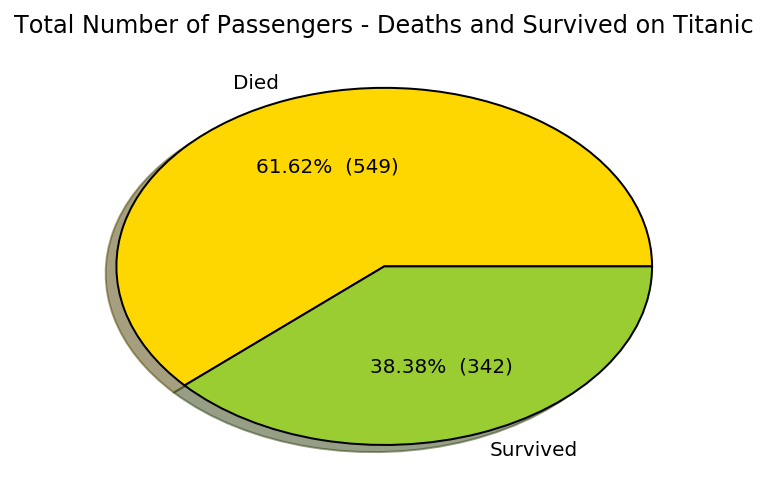

In [16]:
##### survival Rate
# Plot pie chart for Total Number of Passenger Deaths and Survived

dfsurvival= data.groupby('Survived').size()

colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
plt.pie(dfsurvival, shadow = True, colors = colors,
        labels = ['Died', 'Survived'], autopct = make_autopct(dfsurvival))
plt.title('Total Number of Passengers - Deaths and Survived on Titanic')

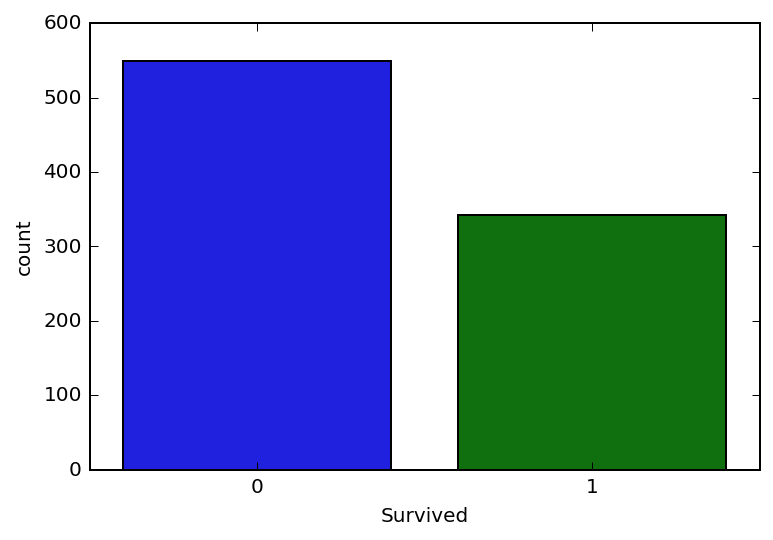

In [17]:
#age
#data.Survived.value_counts()
#plotting the count values for diff types.
sns.countplot(x="Survived", data=data)
plt.show()


 > from both graph we can conclude that the ratio of death were greater than live.

### Sex and Survive

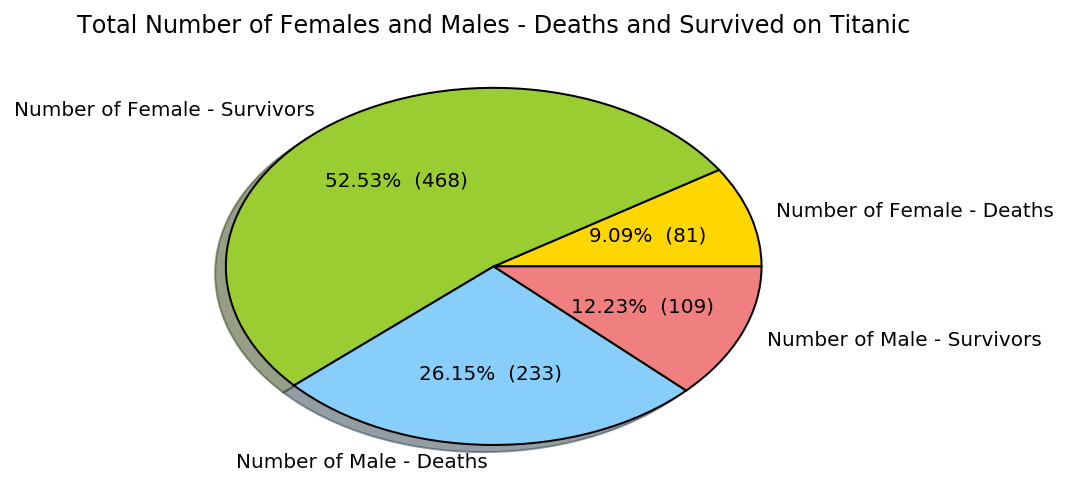

In [18]:


# Plot pie chart for Total Number of Females and Males - Deaths and Survived

survived = data.groupby(('Survived', 'Sex')).size()

colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
plt.pie(survived, shadow = True, colors = colors, labels = ['Number of Female - Deaths',
        'Number of Female - Survivors', 'Number of Male - Deaths', 'Number of Male - Survivors'], 
        autopct = make_autopct(survived))
plt.title('Total Number of Females and Males - Deaths and Survived on Titanic')


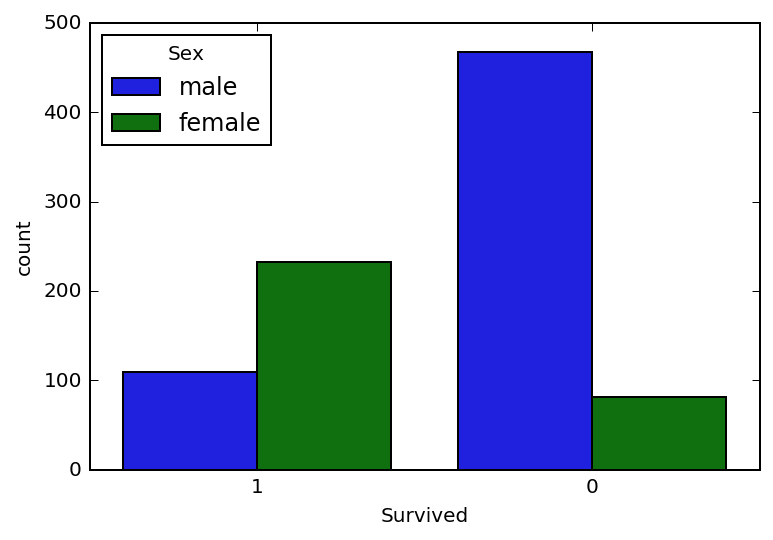

In [19]:
sns.countplot('Survived',hue="Sex",data=data,order=[1,0])


>from the given Data we can explore that the max no of person died were male.

### sex data plotting and converting into integer


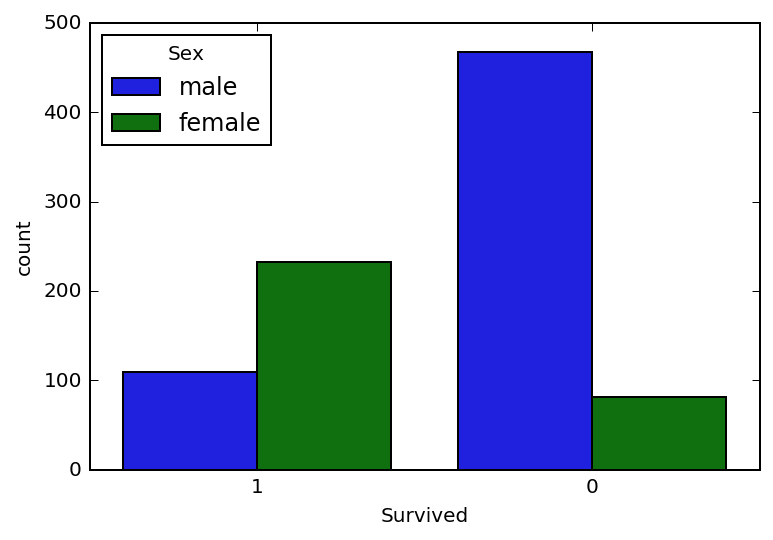

In [20]:
sns.countplot('Survived',hue="Sex",data=data,order=[1,0])

In [21]:
#change with values  for female as 1 and male as 0
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


#change with values  for female as 1 and male as 0
test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


>from the above bar graph we can conclude that the maximum person died were male in ratio.

### Age conversion into ordinal values

In [22]:
# lets convert age into int type.
#assign a group int values.
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age']=4


# lets convert age into int type.
#assign a group int values.
test['Age'] = test['Age'].astype(int)
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']=4

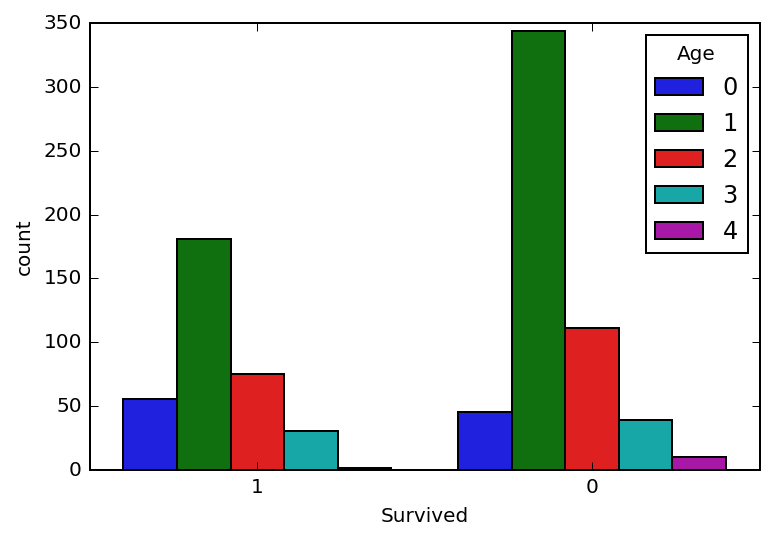

In [23]:
#sns.countplot(x="Age", data=data)
sns.countplot('Survived',hue="Age",data=data,order=[1,0])
plt.show()

### Family conversion into some ordinal values

In [24]:
#family problem
data['Family'] =  data["Parch"] + data["SibSp"]
data['Family'].loc[data['Family'] > 0] = 1
data['Family'].loc[data['Family'] == 0] = 0



test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

/usr/lib/python2.7/dist-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Pclass Vs Survival plotting

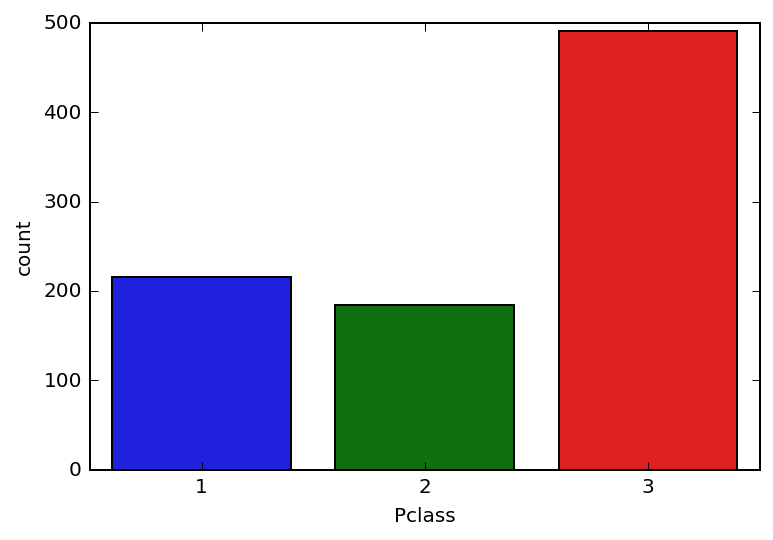

In [25]:
# Group data by Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors
sns.countplot(x="Pclass", data=data)
plt.show()

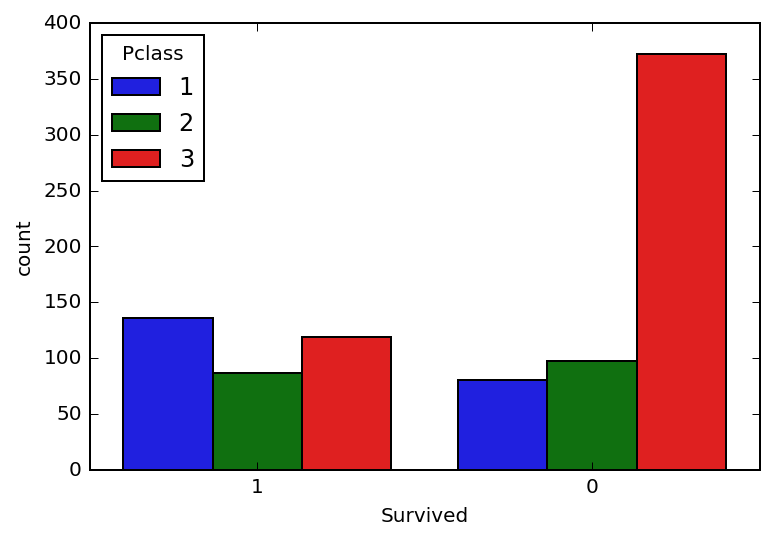

In [26]:
sns.countplot('Survived',hue="Pclass",data=data,order=[1,0])
plt.show()

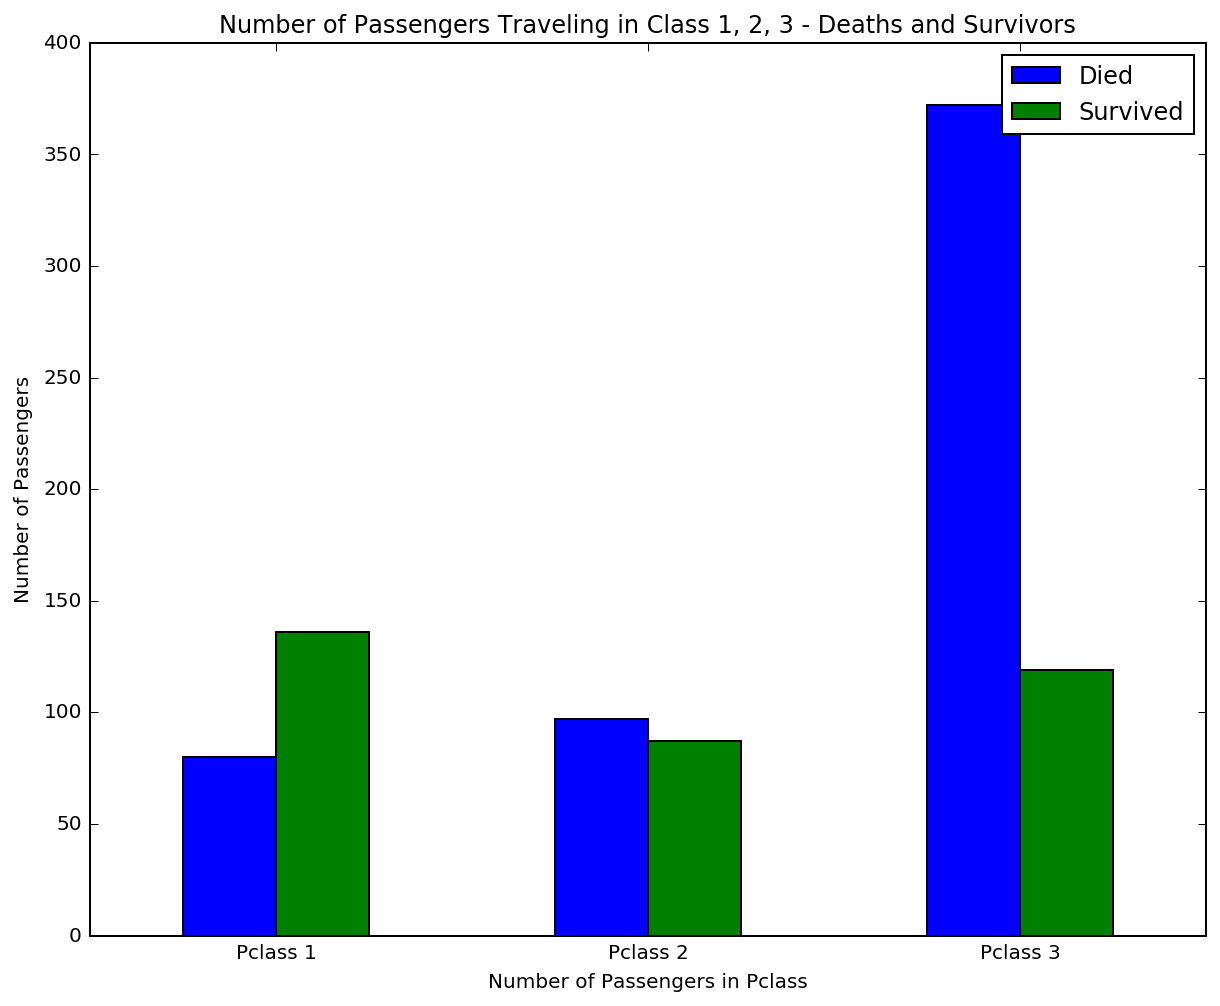

In [27]:
class_survived = data.groupby(["Pclass","Survived"])
objects = ('Pclass 1', 'Pclass 2', 'Pclass 3')
bars = np.arange(len(objects))
class_survived.size().unstack().plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Pclass")
plt.title("Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors")
plt.legend(['Died', 'Survived'])
plt.show()

### Embarked Vs survival data

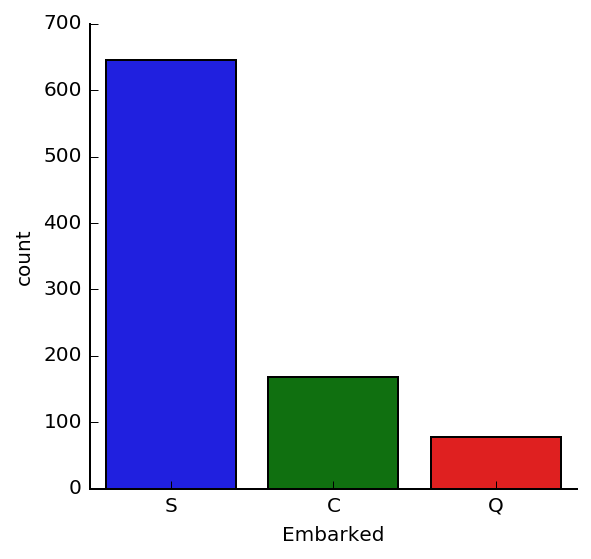

In [28]:
sns.factorplot('Embarked',data=data,kind='count',order=['S','C','Q'])
plt.show()


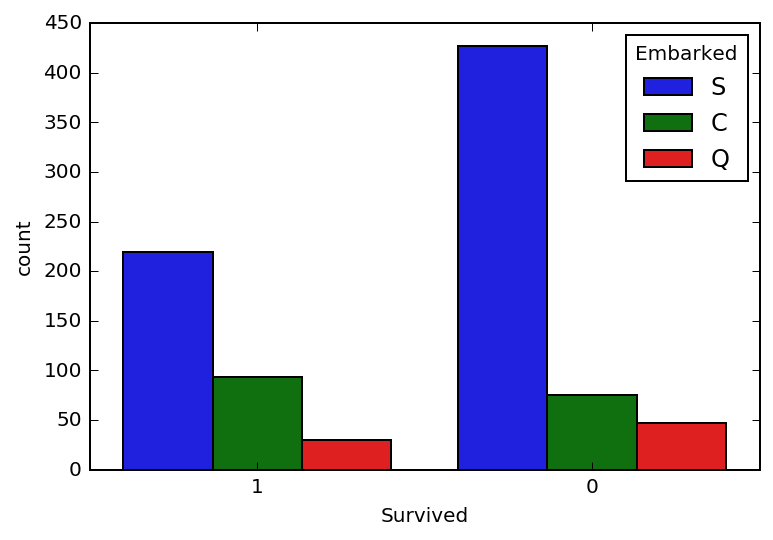

In [29]:
sns.countplot(x='Survived', hue="Embarked", data=data, order=[1,0])


### Fare Vs Survivala and converting Fare into ordinal values

In [30]:
# lets convert age into int type.
#data['Fare'] = data['Fare'].astype(int)
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3



MeanFare = test.Fare.mean()
test.Fare = test.Fare.fillna(value=MeanFare)

# lets convert age into int type.
#data['Fare'] = data['Fare'].astype(int)
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3


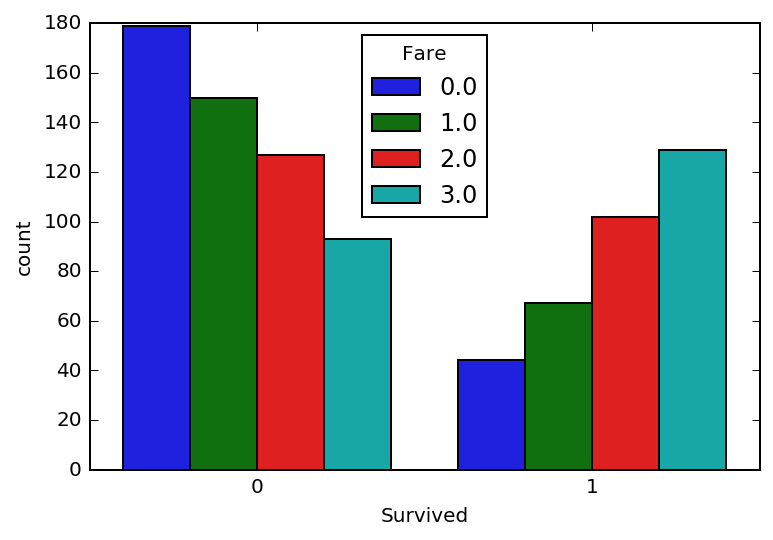

In [31]:
#plotting Fare count interms of suvived and death
sns.countplot(x='Survived', hue="Fare", data=data)
plt.show()

> The Ratio of the death and live in terms of the Fare are shown above
which shows that with high Fare the survival rate was greater than the survival rate with low Fare.

### Cabin

In [32]:
data.Cabin.isnull().sum()
# Group data by Cabin
#cabin = data.groupby("Cabin").size()

687

> since we found lot of cabin Values  are missing so let drop the cabin column.

### connverting names into group and numbering as a group

In [33]:

def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'


def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms','Mlle','Miss']:
        return 4
    elif title in ['Mme','Mrs']:
        return 5
    else:
        return 2
 

In [34]:
#creating New column in  both the dataset as title
data['title'] = data['Name'].apply(get_title).apply(title_map) 

test['title'] = test['Name'].apply(get_title).apply(title_map) 
#df.title

> converting Embarked into group of values

In [35]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


### drop unnecessary columns, these columns won't be useful in analysis and prediction


In [36]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
data = data.drop(['PassengerId','Ticket','Name','Cabin','SibSp','Parch'], axis=1)
test = test.drop(['Ticket','Name','Cabin','SibSp','Parch'], axis=1)

#test_df    = test_df.drop(['Name','Ticket'], axis=1)

### Creating Datasets for fed into machine learning algo.

In [37]:
X_train = data.drop("Survived",axis=1)
Y_train = data["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

### LogisticRegression

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print("logistic regression : ",acc_log)


('logistic regression : ', 80.47)


### K-NN 

In [39]:
# k-NN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print("k-NN : ",acc_knn)

('k-NN : ', 84.51)


### Gradient Boosting Classifier

In [40]:

gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, Y_train)

Y_pred_2 = gradient_boost.predict(X_test)

grad=round(gradient_boost.score(X_train, Y_train)*100,2)
print ("Gradient Boost: ",grad)

('Gradient Boost: ', 84.4)


### Random Forest Classifier

In [41]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Random Forest : " , acc_random_forest)

('Random Forest : ', 86.87)


In [42]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest','gradient_boost'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest,grad]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,86.87
0,KNN,84.51
3,gradient_boost,84.40
1,Logistic Regression,80.47


In [43]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

### Conclusion 

> From the Above model that I have applied have got some good results but still can do better